<a href="https://colab.research.google.com/github/AlexandruRO45/ML_DS_Case_Studies/blob/exp/Case_Study_3__Filtering_MRipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study Feature Engineering


### Preloaded stuff

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import csv
import numpy as np

from matplotlib import pyplot as plt

In [14]:
# load data
# rows in X are subject major order, i.e. rows 0-9 are all samples from subject 0, rows 10-19 all samples from subject 1, etc.
# columns in X are in feature_type major order, i.e. columns 0-47 are alpha band power, eyes closed, electrodes 0-48
# feature identifiers for all columns in X are stored in feature_names.csv
X = np.loadtxt('/content/drive/MyDrive/ML&AI Class/Case Study 3/data.csv', delimiter=',')
y = np.loadtxt('/content/drive/MyDrive/ML&AI Class/Case Study 3/labels.csv', delimiter=',')
with open('/content/drive/MyDrive/ML&AI Class/Case Study 3/feature_names.csv') as f:
    csvreader = csv.reader(f, delimiter=',')
    feature_names = [row for row in csvreader][0]

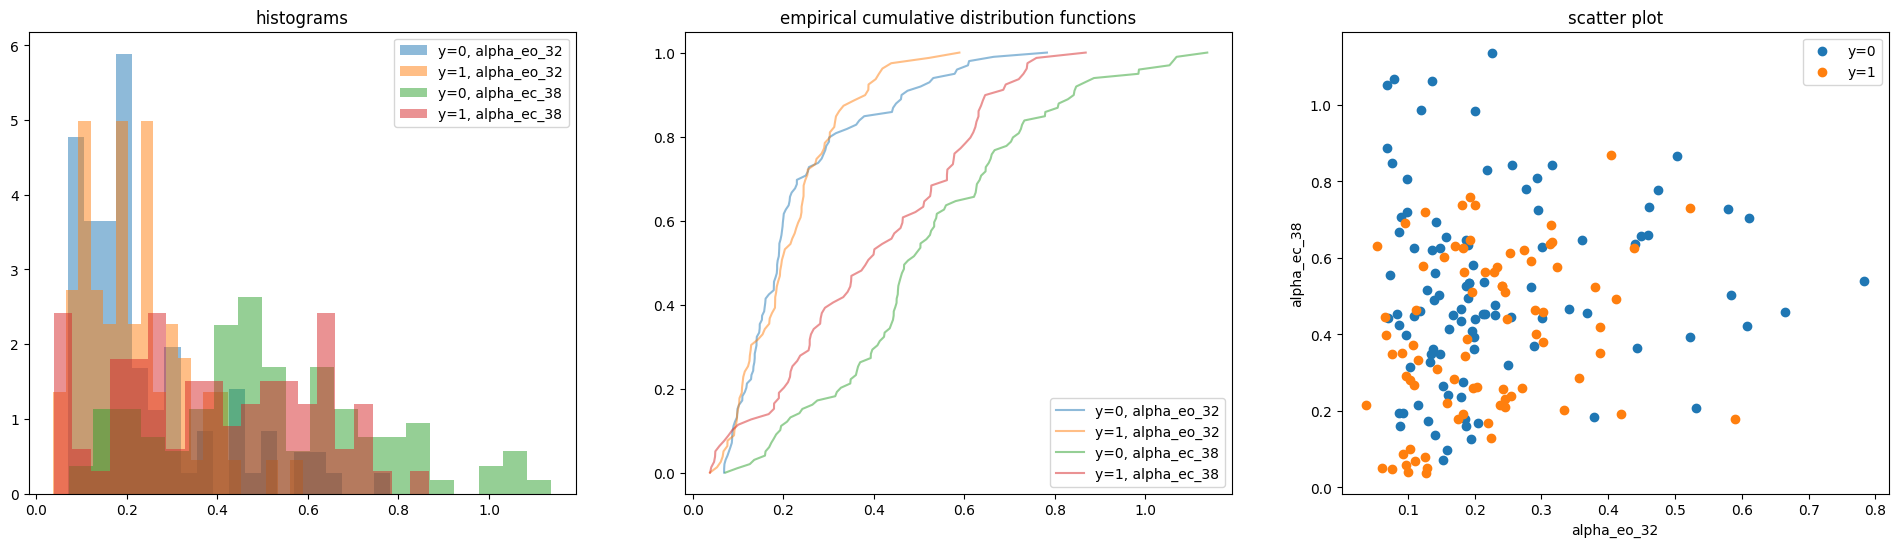

In [15]:
# plotting data in 2D with axes sampled
# a) at random
# b) from same electrode
# c) from same feature type
num_features = 9
num_electrodes = 48

# a) indices drawn at random
i0, i1 = np.random.randint(0, X.shape[1], size=2)

# b) same electrode, different feature (uncomment lines below)
#f0, f1 = np.random.randint(0, num_features, size=2)
#e = np.random.randint(0, num_electrodes)
#i0, i1 = f0*num_electrodes + e, f1*num_electrodes + e

# b) same feature, different electrode (uncomment lines below)
#f = np.random.randint(0, num_features)
#e0, e1 = np.random.randint(0, num_electrodes, size=2)
#i0, i1 = f*num_electrodes + e0, f*num_electrodes + e1

fig, axes = plt.subplots(1, 3, figsize=(24, 6))
colors = ['blue', 'red']

# select features i0, i1 and separate by class
X00, X01 = X[y==0][:,i0], X[y==1][:,i0]
X10, X11 = X[y==0][:,i1], X[y==1][:,i1]
# plot cumulative distribution of feature i0 separate for each class
axes[0].hist(X00, bins=20, label='y=0, '+ feature_names[i0], density=True, alpha=0.5)
axes[0].hist(X01, bins=20, label='y=1, '+ feature_names[i0], density=True, alpha=0.5)
axes[0].hist(X10, bins=20, label='y=0, '+ feature_names[i1], density=True, alpha=0.5)
axes[0].hist(X11, bins=20, label='y=1, '+ feature_names[i1], density=True, alpha=0.5)
axes[0].set_title('histograms')
axes[0].legend()
axes[1].plot(np.sort(X00), np.linspace(0,1,X00.shape[0]), label='y=0, '+ feature_names[i0], alpha=0.5)
axes[1].plot(np.sort(X01), np.linspace(0,1,X01.shape[0]), label='y=1, '+ feature_names[i0], alpha=0.5)
axes[1].plot(np.sort(X10), np.linspace(0,1,X10.shape[0]), label='y=0, '+ feature_names[i1], alpha=0.5)
axes[1].plot(np.sort(X11), np.linspace(0,1,X11.shape[0]), label='y=1, '+ feature_names[i1], alpha=0.5)
axes[1].set_title('empirical cumulative distribution functions')
axes[1].legend()
axes[2].scatter(X00, X10, label='y=0')
axes[2].scatter(X01, X11, label='y=1')
axes[2].set_xlabel(feature_names[i0])
axes[2].set_ylabel(feature_names[i1])
axes[2].set_title('scatter plot')
axes[2].legend()

### Actual start of CS3 - Data Visualization

In [16]:
import pandas as pd

# File paths
data_file = '/content/drive/MyDrive/ML&AI Class/Case Study 3/data.csv'
feature_names_file = '/content/drive/MyDrive/ML&AI Class/Case Study 3/feature_names.csv'
labels_file = '/content/drive/MyDrive/ML&AI Class/Case Study 3/labels.csv'

# Load the datasets
data = pd.read_csv(data_file, header=None)
feature_names = pd.read_csv(feature_names_file, header=None)
labels = pd.read_csv(labels_file, header=None)

# Display the first few rows of each dataset to understand their structure
data_head = data.head()
feature_names_head = feature_names.head()
labels_head = labels.head()

data_head, feature_names_head, labels_head

(       0        1        2        3        4        5        6        7    \
 0  0.11184  0.12387  0.12858  0.11324  0.10571  0.10690  0.10756  0.11064   
 1  0.29834  0.26881  0.26239  0.38009  0.34358  0.28500  0.24791  0.25033   
 2  0.36912  0.39587  0.38999  0.25772  0.40554  0.44199  0.44004  0.39947   
 3  0.76120  0.77726  0.77042  0.60161  0.70183  0.72725  0.76245  0.78904   
 4  0.16770  0.15146  0.14714  0.15728  0.14965  0.14154  0.13228  0.12760   
 
        8        9    ...      422      423      424      425      426  \
 0  0.10875  0.15893  ...  0.57161  0.73870  0.58709  0.55198  0.54811   
 1  0.26047  0.26016  ...  0.35142  0.32788  0.43164  0.49603  0.40680   
 2  0.31546  0.28348  ...  0.61924  0.86506  1.09310  0.31759  0.36353   
 3  0.72984  0.52236  ...  0.23456  0.25090  0.43196  0.71301  0.53340   
 4  0.14351  0.17252  ...  1.82160  1.73190  1.24420  2.76220  3.00930   
 
        427      428      429      430      431  
 0  0.57869  0.59345  0.60436  0.5

###Import

In [17]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest,chi2, f_classif, mutual_info_classif
from sklearn.model_selection import cross_val_score , train_test_split,LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import pearsonr
from sklearn.model_selection import LeaveOneGroupOut
import json
import matplotlib.pyplot as plt

# 1. Filtering Method for the feature selection

### Data prepared

In [18]:
X=data
y=labels


# Encode categorical variables if needed
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

y_processed = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform').fit_transform(y.values.reshape(-1, 1)).flatten()

### Get scores for the features.

In [19]:
#Get p and f values
p_values,f_statistic=f_classif(X,y_processed)

#get chi2 value
chi2_scores, _=chi2(X,y_processed)

#get also mutual info
mutual_info_scores=mutual_info_classif(X,y_processed)

f_scores=pd.DataFrame({
    'Feature': X.columns,
    'P_values': p_values,
    'Chi2':chi2_scores,
    'Mutual_Information':mutual_info_scores
})


#Rank them. SUM all scores and take the top K calculated in the next step.
f_scores['Sum']=f_scores.sum(axis=1)
f_scores_ranked=f_scores.sort_values(by='Sum', ascending=False)
print(f_scores_ranked)

     Feature   P_values      Chi2  Mutual_Information         Sum
431      431   0.069766  0.030329            0.000000  431.100095
428      428   1.375787  0.752748            0.019688  430.148223
430      430   0.002712  0.001654            0.027933  430.032299
429      429   0.085931  0.048204            0.000000  429.134136
426      426   0.994241  0.800083            0.043460  427.837784
..       ...        ...       ...                 ...         ...
3          3  11.898726  1.272496            0.073688   16.244910
8          8   6.852012  0.625698            0.000000   15.477710
2          2  10.872416  1.053551            0.000000   13.925967
0          0  12.553564  1.320710            0.050571   13.924845
1          1  11.165557  1.133364            0.000000   13.298921

[432 rows x 5 columns]


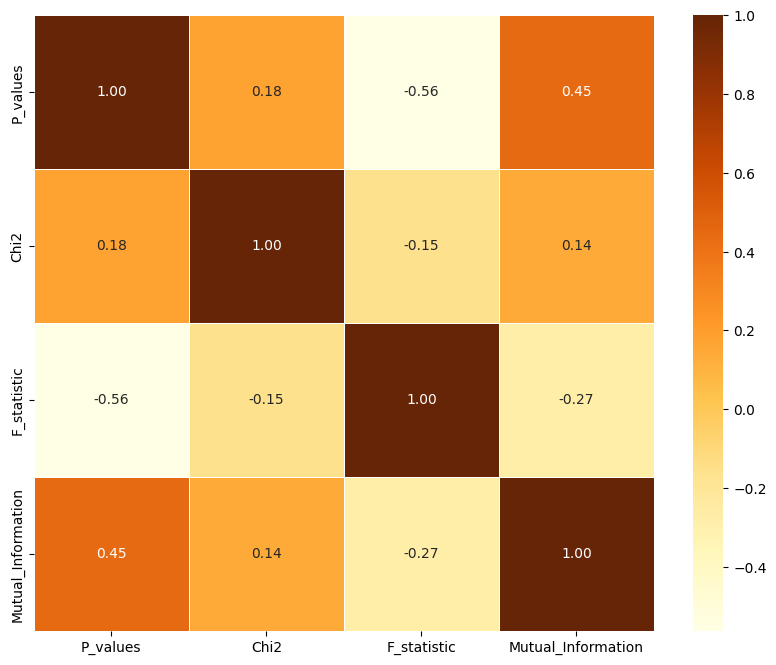

In [57]:

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = features_scores[['P_values', 'Chi2','F_statistic' ,'Mutual_Information']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrBr', fmt='.2f', linewidths=0.5)
plt.show()

### Optimization of parameters for SVM & KNN

---



In [20]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# KNN Classifier
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=LeaveOneOut())
knn_grid_search.fit(X,y_processed)

print("KNN Best Parameters:", knn_grid_search.best_params_)
print("KNN Best Score:", knn_grid_search.best_score_)

# SVM Classifier
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

svm_param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=LeaveOneOut())
svm_grid_search.fit(X,y_processed)

print("\nSVM Best Parameters:", svm_grid_search.best_params_)
print("SVM Best Score:", svm_grid_search.best_score_)

KNN Best Parameters: {'knn__n_neighbors': 3, 'knn__p': 2, 'knn__weights': 'uniform'}
KNN Best Score: 0.9277777777777778

SVM Best Parameters: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
SVM Best Score: 0.9277777777777778


###this is the baseline. no chi2, just LOO on SVM and KNN. The final value of accuracy is the mean of all groups

Max SVM Accuracy: 0.8722222222222222 for k = 1
Max KNN Accuracy: 0.7944444444444446 for k = 1


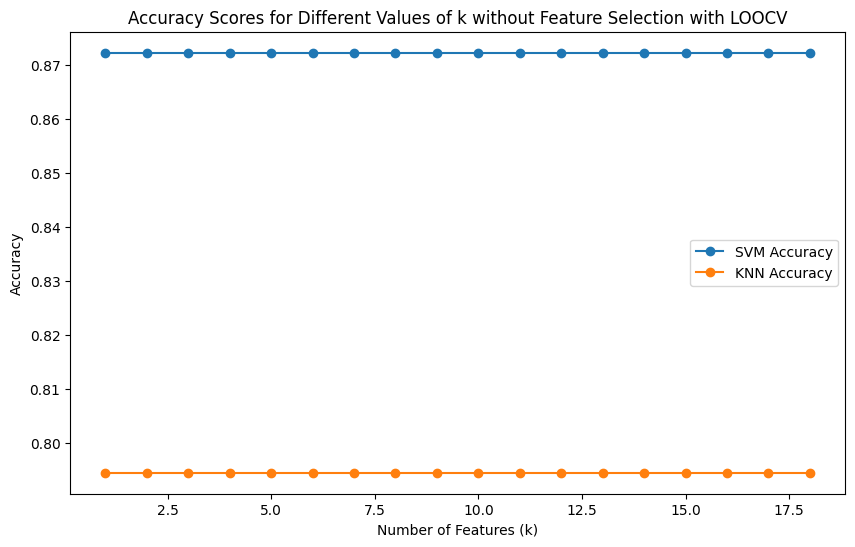

In [93]:
groups = np.repeat(np.arange(1, 19), 10)

# Initialize lists to store accuracy scores
svm_accuracies = []
knn_accuracies = []

for k in range(1, 19):  # You can adjust the range based on your requirements
    loo = LeaveOneGroupOut()

    svm_accuracy_group = []
    knn_accuracy_group = []

    for train_index, test_index in loo.split(data, labels, groups):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]

        # Train SVM model without feature selection
        svm_model = SVC(C=1, gamma='scale', kernel='linear')
        svm_model.fit(X_train, y_train.values.ravel())
        svm_predictions = svm_model.predict(X_test)
        svm_accuracy_group.append(accuracy_score(y_test, svm_predictions))

        # Train KNN model without feature selection
        knn_model = KNeighborsClassifier(n_neighbors=3, p=1, weights='uniform')
        knn_model.fit(X_train, y_train.values.ravel())
        knn_predictions = knn_model.predict(X_test)
        knn_accuracy_group.append(accuracy_score(y_test, knn_predictions))

    # Take the mean accuracy across all groups
    svm_accuracies.append(np.mean(svm_accuracy_group))
    knn_accuracies.append(np.mean(knn_accuracy_group))

# Find the maximum accuracy and corresponding number of features for SVM and KNN
max_svm_accuracy = max(svm_accuracies)
max_svm_k = svm_accuracies.index(max_svm_accuracy) + 1  # Adding 1 because the index starts from 0

max_knn_accuracy = max(knn_accuracies)
max_knn_k = knn_accuracies.index(max_knn_accuracy) + 1  # Adding 1 because the index starts from 0

print(f"Max SVM Accuracy: {max_svm_accuracy} for k = {max_svm_k}")
print(f"Max KNN Accuracy: {max_knn_accuracy} for k = {max_knn_k}")

# Plot the accuracy scores for different values of k (if needed)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 19), svm_accuracies, marker='o', label='SVM Accuracy')
plt.plot(range(1, 19), knn_accuracies, marker='o', label='KNN Accuracy')
plt.xlabel('Number of Features (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Values of k without Feature Selection with LOOCV')
plt.legend()
plt.show()


### this is filter chi2, LOOCV and optimizaiton on SVM and KNN


Max SVM Accuracy: 0.9166666666666666 for k = 338
Max KNN Accuracy: 0.7555555555555556 for k = 67


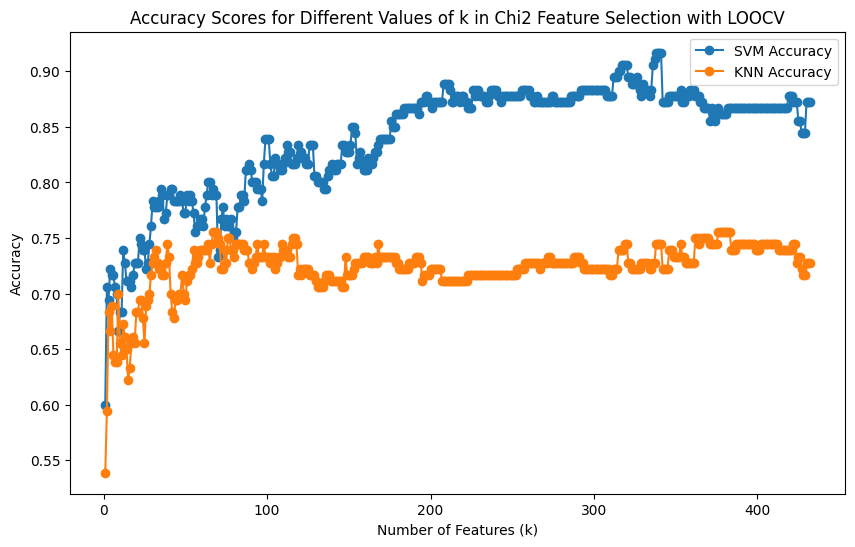

In [21]:
groups = np.repeat(np.arange(1, 19), 10)

# Initialize lists to store accuracy scores
svm_accuracies = []
knn_accuracies = []

# Try different values of k for chi2 feature selection
for k in range(1, 433):  # You can adjust the range based on your requirements
    loo = LeaveOneGroupOut()

    # Apply chi2 feature selection
    chi2_selector = SelectKBest(chi2, k=k)
    data_chi2 = chi2_selector.fit_transform(data, labels)

    svm_accuracy_group = []
    knn_accuracy_group = []

    for train_index, test_index in loo.split(data_chi2, labels, groups):
        X_train, X_test = data_chi2[train_index], data_chi2[test_index]
        y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]

        data_chi2_train = chi2_selector.fit_transform(X_train, y_train.values.ravel())
        data_chi2_test = chi2_selector.transform(X_test)

        # Train SVM model
        svm_model = SVC(C=1, gamma='scale', kernel='linear')
        svm_model.fit(data_chi2_train, y_train.values.ravel())
        svm_predictions = svm_model.predict(data_chi2_test)
        svm_accuracy_group.append(accuracy_score(y_test, svm_predictions))

        # Train KNN model
        knn_model = KNeighborsClassifier(n_neighbors=3, p=1, weights='uniform')
        knn_model.fit(data_chi2_train, y_train.values.ravel())
        knn_predictions = knn_model.predict(data_chi2_test)
        knn_accuracy_group.append(accuracy_score(y_test, knn_predictions))

    # Take the mean accuracy across all groups
    svm_accuracies.append(np.mean(svm_accuracy_group))
    knn_accuracies.append(np.mean(knn_accuracy_group))

# Find the maximum accuracy and corresponding number of features for SVM and KNN
max_svm_accuracy = max(svm_accuracies)
max_svm_k = svm_accuracies.index(max_svm_accuracy) + 1  # Adding 1 because the index starts from 0

max_knn_accuracy = max(knn_accuracies)
max_knn_k = knn_accuracies.index(max_knn_accuracy) + 1  # Adding 1 because the index starts from 0

print(f"Max SVM Accuracy: {max_svm_accuracy} for k = {max_svm_k}")
print(f"Max KNN Accuracy: {max_knn_accuracy} for k = {max_knn_k}")

# Plot the accuracy scores for different values of k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 433), svm_accuracies, marker='o', label='SVM Accuracy')
plt.plot(range(1, 433), knn_accuracies, marker='o', label='KNN Accuracy')
plt.xlabel('Number of Features (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Values of k in Chi2 Feature Selection with LOOCV')
plt.legend()
plt.show()

### Visualization


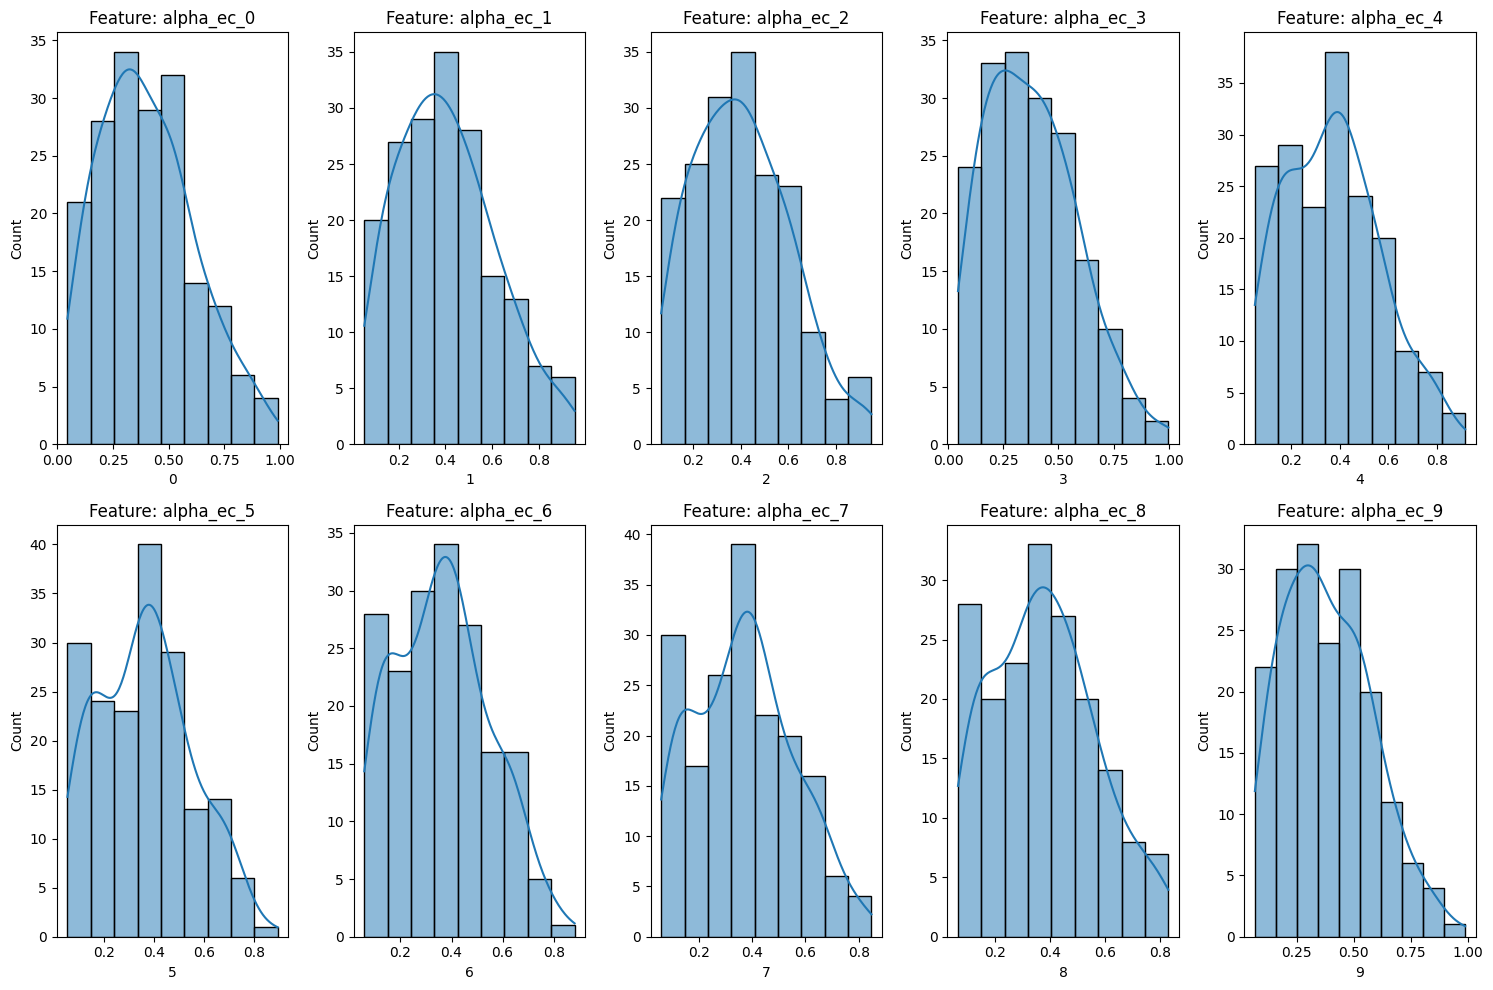

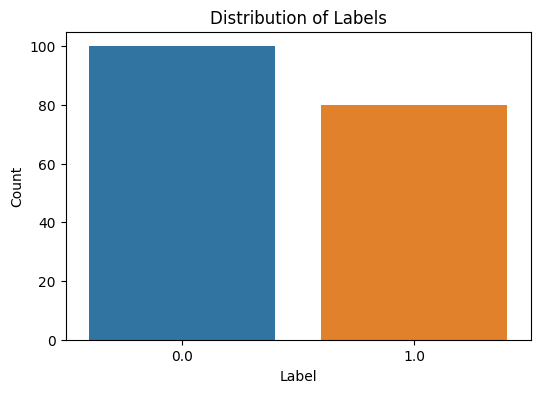

(              0           1           2           3           4           5    \
 count  180.000000  180.000000  180.000000  180.000000  180.000000  180.000000   
 mean     0.403767    0.406051    0.404508    0.378024    0.370230    0.363051   
 std      0.212651    0.208703    0.203369    0.207096    0.194484    0.188324   
 min      0.045305    0.052493    0.064302    0.045197    0.052021    0.054035   
 25%      0.240980    0.249482    0.258088    0.209325    0.209490    0.198185   
 50%      0.377190    0.384445    0.390135    0.358825    0.372940    0.360960   
 75%      0.540840    0.541517    0.544342    0.511320    0.503810    0.486233   
 max      0.991070    0.952930    0.950500    0.998370    0.914860    0.893100   
 
               6           7           8           9    ...         422  \
 count  180.000000  180.000000  180.000000  180.000000  ...  180.000000   
 mean     0.363476    0.369076    0.377025    0.384056  ...    0.999865   
 std      0.186206    0.186509    0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistical summary of the data
data_description = data.describe()

# Checking for missing values in the data
missing_values = data.isnull().sum().sum()

# Distribution of labels (to understand the balance between classes)
label_counts = labels[0].value_counts()

# Visualizing the distribution of a few features (selecting first 10 for demonstration)
plt.figure(figsize=(15, 10))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    sns.histplot(data.iloc[:, i-1], kde=True)
    plt.title(f'Feature: {feature_names.iloc[0, i-1]}')
plt.tight_layout()

# Visualizing the label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=labels[0])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

(data_description, missing_values, label_counts)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Converting the normalized data back to a DataFrame for ease of use
data_normalized_df = pd.DataFrame(data_normalized, columns=feature_names.iloc[0])

# Displaying the first few rows of the normalized data to verify the transformation
data_normalized_df.head()


,alpha_ec_0,alpha_ec_1,alpha_ec_2,alpha_ec_3,alpha_ec_4,alpha_ec_5,alpha_ec_6,alpha_ec_7,alpha_ec_8,alpha_ec_9,...,ratio_theta_38,ratio_theta_39,ratio_theta_40,ratio_theta_41,ratio_theta_42,ratio_theta_43,ratio_theta_44,ratio_theta_45,ratio_theta_46,ratio_theta_47
0,-1.376627,-1.355841,-1.360565,-1.282122,-1.363906,-1.363955,-1.378199,-1.389515,-1.426743,-1.157623,...,-0.571508,-0.356933,-0.536192,-0.556666,-0.537475,-0.503384,-0.537981,-0.551653,-0.531866,-0.098731
1,-0.497158,-0.659425,-0.700764,0.010004,-0.137413,-0.415607,-0.622363,-0.638454,-0.619863,-0.637086,...,-0.865352,-0.880993,-0.744585,-0.629078,-0.692528,-0.843956,-0.442532,-0.578909,-0.657889,-0.488323
2,-0.163383,-0.048920,-0.071584,-0.582529,0.182062,0.420333,0.412327,0.163416,-0.327414,-0.517172,...,-0.507945,-0.195742,0.142157,-0.860019,-0.740006,-0.597103,-0.890343,-0.698610,-0.452494,-0.685516
3,1.685531,1.783604,1.804268,1.082636,1.709777,1.939286,2.148622,2.257987,1.876349,0.711178,...,-1.021302,-0.979193,-0.744156,-0.348257,-0.553615,-0.879248,-0.418243,-0.473488,-0.937870,-0.333193
4,-1.113211,-1.223275,-1.269047,-1.068874,-1.137345,-1.179503,-1.245073,-1.298327,-1.241881,-1.087742,...,1.096609,0.910039,0.344719,2.303849,2.163080,1.874839,2.100949,2.081342,1.357638,1.778195


## Feature Extraction - not done
This code is to be run with tabulated data. A loop can be created to run for both Wrapping and embedding with SVM and KNN. both methods with both classifiers.

###Feature extraction 1

In [97]:



# Optimal k values
optimal_k_svm = 338
optimal_k_knn = 282

# Apply chi2 feature selection with optimal k values
chi2_selector_svm = SelectKBest(chi2, k=optimal_k_svm)
chi2_selector_knn = SelectKBest(chi2, k=optimal_k_knn)

data_chi2_svm = chi2_selector_svm.fit_transform(f_scores_ranked, labels)
data_chi2_knn = chi2_selector_knn.fit_transform(f_scores_ranked, labels)

# Apply PCA
pca = PCA(n_components=2)

# Transform the data for visualization
data_pca_svm = pca.fit_transform(data_chi2_svm)
data_pca_knn = pca.fit_transform(data_chi2_knn)

# Visualize SVM
plt.figure(figsize=(10, 5))
plt.scatter(data_pca_svm[:, 0], data_pca_svm[:, 1], c=labels.values.ravel(), cmap='viridis', edgecolor='k')
plt.title('PCA Visualization for SVM (Optimal k)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Visualize KNN
plt.figure(figsize=(10, 5))
plt.scatter(data_pca_knn[:, 0], data_pca_knn[:, 1], c=labels.values.ravel(), cmap='viridis', edgecolor='k')
plt.title('PCA Visualization for KNN (Optimal k)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

ValueError: ignored

### Feature extraction 2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


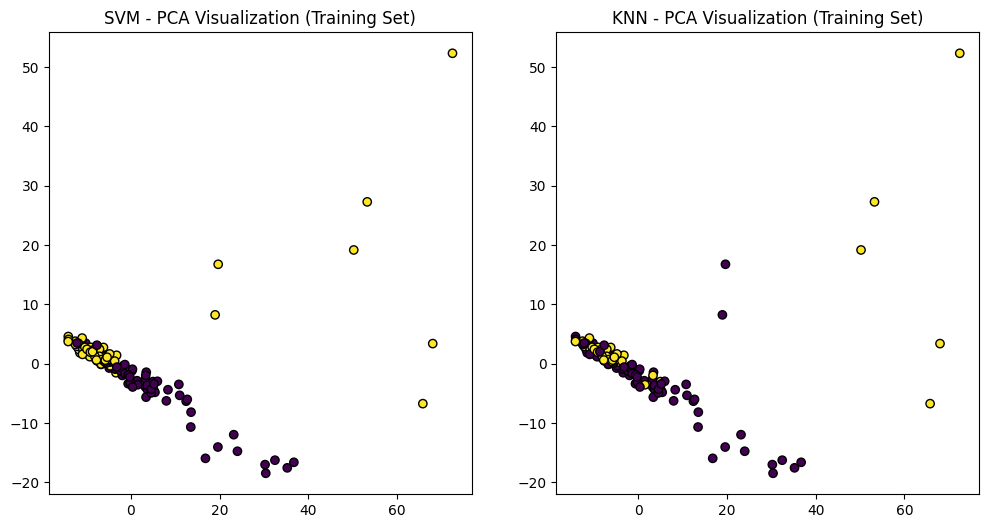

In [48]:

# Apply chi2 feature selection
k_best = 40  # You can adjust the number of features based on your requirements
data_chi2 = SelectKBest(chi2, k=k_best).fit_transform(data, labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_chi2, labels, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Visualize using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Visualize SVM results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=svm_model.predict(X_train), cmap='viridis', edgecolor='k')
plt.title('SVM - PCA Visualization (Training Set)')

# Visualize KNN results
plt.subplot(1, 2, 2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=knn_model.predict(X_train), cmap='viridis', edgecolor='k')
plt.title('KNN - PCA Visualization (Training Set)')

plt.show()


### Feature extraction 3


PCA Data:
        PC1       PC2
0 -9.630958  3.334920
1  3.575501 -5.782475
2 -5.970396  1.294217
3  1.544604 -5.794331
4  7.813587  3.288986


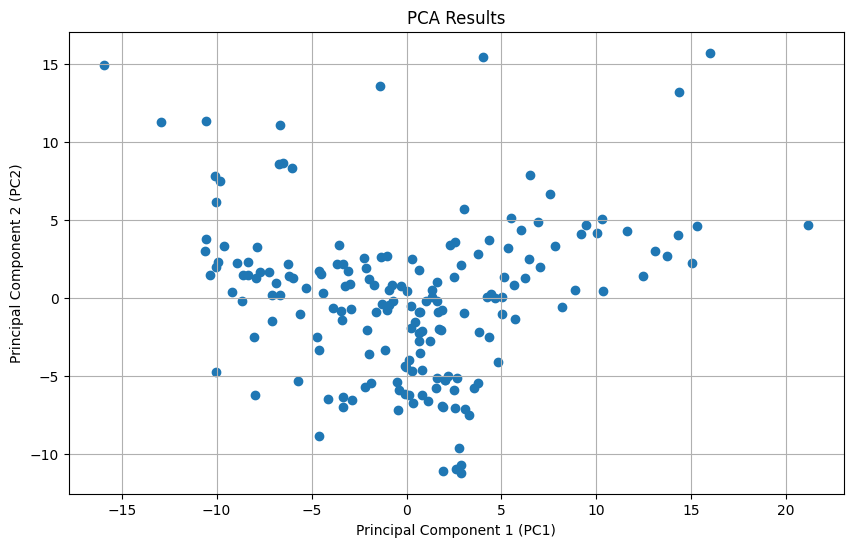

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming your data is stored in the variable selected_data_df

# Extracting categorical features
alpha_ec_cols = [col for col in selected_data_df.columns if 'alpha_ec_' in col]
ratio_beta_cols = [col for col in selected_data_df.columns if 'ratio_beta_' in col]

# One-Hot Encoding
selected_data_df_encoded = pd.get_dummies(selected_data_df, columns=alpha_ec_cols + ratio_beta_cols)

# Extracting numerical features
numerical_cols = [col for col in selected_data_df.columns if col not in (alpha_ec_cols + ratio_beta_cols)]

# Normalization (Standardization)
scaler = StandardScaler()
selected_data_df[numerical_cols] = scaler.fit_transform(selected_data_df[numerical_cols])

# Display the results


from sklearn.decomposition import PCA

# Assuming your data is stored in the variable selected_data_df_encoded

# Extract numerical features for PCA
numerical_cols = [col for col in selected_data_df_encoded.columns if col not in (alpha_ec_cols + ratio_beta_cols)]

# Perform PCA
pca = PCA(n_components=2)  # You can choose the number of components as needed
pca_result = pca.fit_transform(selected_data_df_encoded[numerical_cols])

# Create a DataFrame for PCA results
pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Display the results
print("PCA Data:")
print(pca_data.head())

import matplotlib.pyplot as plt

# Assuming you have already performed PCA and have the pca_data DataFrame

# Scatter plot for the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_data['PC1'], pca_data['PC2'])
plt.title('PCA Results')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()